# Unsupervised Learning using Scikit Learn

In [2]:
!pip install numpy pandas matplotlib seaborn --quiet

In [3]:
!pip install jovian opendatasets graphviz scikit-learn plotly --upgrade --quiet

     |████████████████████████████████| 68 kB 3.5 MB/s 
     |████████████████████████████████| 46 kB 2.9 MB/s 
     |████████████████████████████████| 27.7 MB 23.9 MB/s 


## Clustering 


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [5]:
iris_df = sns.load_dataset('iris')

In [6]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


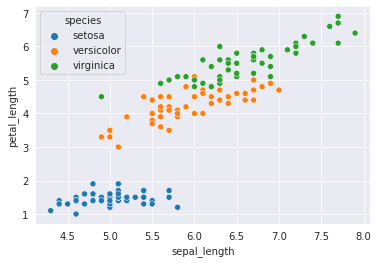

In [7]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species');

We'll attempt to cluster observations using numeric columns in the data. 

In [8]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

In [9]:
X = iris_df[numeric_cols]

### K Means Clustering

Let's apply K-means clustering to the Iris dataset.

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters=3, random_state=42)

In [12]:
model.fit(X)

KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster.

In [13]:
model.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

We can now classify points using the model.

In [14]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
preds = model.predict(X)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

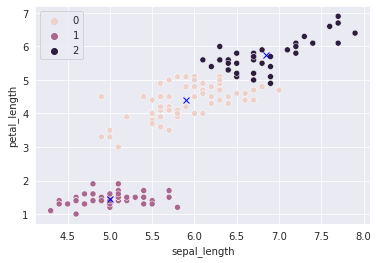

In [16]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [17]:
model.inertia_

78.851441426146

Let's try creating 6 clusters.

In [18]:
model = KMeans(n_clusters=6, random_state=42).fit(X)

In [19]:
preds = model.predict(X)
preds

array([5, 1, 1, 1, 5, 5, 1, 5, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5,
       1, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 5, 1, 1, 5, 5, 1, 5, 5, 1, 1, 5,
       5, 1, 5, 1, 5, 1, 3, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0,
       4, 4, 4, 3, 4, 4, 4, 0, 0, 3, 4, 3, 0, 3, 4, 0, 3, 3, 4, 0, 0, 0,
       4, 3, 3, 0, 4, 4, 3, 4, 4, 4, 3, 4, 4, 4, 3, 4, 4, 3], dtype=int32)

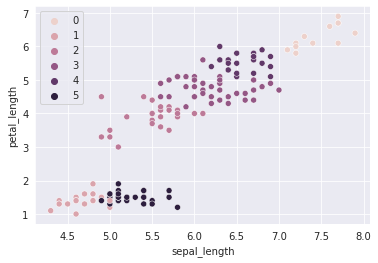

In [20]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds);

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

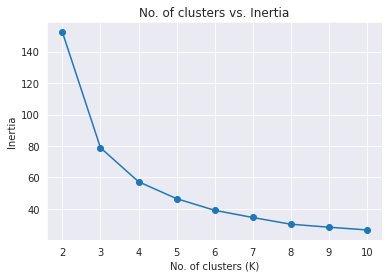

In [21]:
options = range(2,11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia');

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

### DBSCAN

In [22]:
from sklearn.cluster import DBSCAN

In [23]:
?DBSCAN

In [24]:
model = DBSCAN(eps=1.1, min_samples=4)

In [25]:
model.fit(X)

DBSCAN(eps=1.1, min_samples=4)

In DBSCAN, there's no prediction step. It directly assigns labels to all the inputs.

In [26]:
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

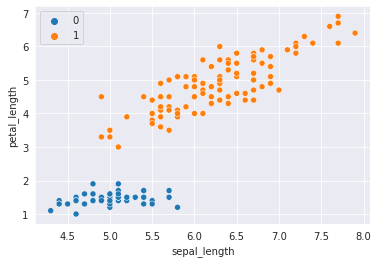

In [27]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=model.labels_);

## Dimensionality Reduction and Manifold Learning


### Principal Component Analysis (PCA)

In [28]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
numeric_cols

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [30]:
from sklearn.decomposition import PCA

In [31]:
?PCA

In [32]:
pca = PCA(n_components=2)

In [33]:
pca.fit(iris_df[numeric_cols])

PCA(n_components=2)

In [34]:
pca

PCA(n_components=2)

In [35]:
transformed = pca.transform(iris_df[numeric_cols])

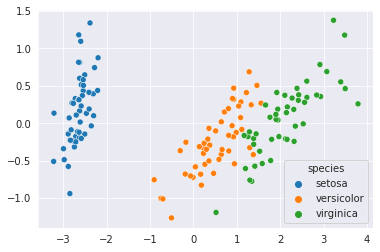

In [36]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);

As you can see, the PCA algorithm has done a very good job of separating different species of flowers using just 2 measures.

### t-Distributed Stochastic Neighbor Embedding (t-SNE)


In [37]:
from sklearn.manifold import TSNE

In [38]:
?TSNE

In [39]:
tsne = TSNE(n_components=2)

In [40]:
transformed = tsne.fit_transform(iris_df[numeric_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


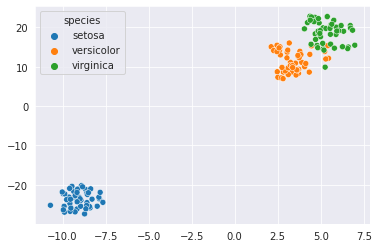

In [41]:
sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=iris_df['species']);